In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfs = []
for i in range(10):
    df = pd.read_csv(f'states{i}.csv')
    dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)

final_df.drop('Unnamed: 0', axis=1, inplace=True)


In [3]:
final_df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


# EDA

In [4]:
final_df.shape

(60, 10)

In [5]:
final_df.duplicated().sum()

9

In [6]:
final_df.drop_duplicates(inplace=True,ignore_index=True)

In [7]:
final_df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [8]:
final_df.White = final_df.White.str.replace("%", "").astype(float)
final_df.Black = final_df.Black.str.replace("%", "").astype(float)
final_df.Native = final_df.Native.str.replace("%", "").astype(float)
final_df.Asian = final_df.Asian.str.replace("%", "").astype(float)
final_df.Pacific = final_df.Pacific.str.replace("%", "").astype(float)

In [9]:
final_df.Hispanic = final_df.Hispanic.str.replace("%", "").astype(float)

In [10]:
final_df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,$67264.78230266465,19087135M_19334329F


In [11]:
final_df[['Male','Female']] = final_df.GenderPop.str.split("_",expand=True)

In [12]:
final_df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,$43296.35860306644,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,$70354.74390243902,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,$54207.82095490716,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,$41935.63396778917,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,$67264.78230266465,19087135M_19334329F,19087135M,19334329F


In [13]:
final_df.Income = final_df.Income.str.replace("$", "").astype(float)

In [14]:
final_df.Male = final_df.Male.str.replace("M", "")
final_df.Female = final_df.Female.str.replace("F", "")

In [15]:
final_df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329


In [16]:
final_df.Male = final_df.Male.astype(int)

In [17]:
final_df['Female'] = final_df['Female'].replace('', np.nan)
final_df['Female'] = final_df['Female'].fillna(final_df['TotalPop'] - final_df['Male'])

In [18]:
final_df.Female = final_df.Female.astype(int)

In [19]:
final_df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329


In [20]:
final_df.loc[final_df['Pacific'].isna(), 'Pacific'] = final_df.loc[final_df['Pacific'].isna()].apply(
    lambda row: 100 - (row['Hispanic'] + row['White'] + row['Black'] + row['Native'] + row['Asian']),
    axis=1
)


In [21]:
final_df['Pacific'].isna().sum()

0

In [22]:
final_df.drop('GenderPop',axis=1,inplace=True)
final_df.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093,2489527
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160,349215
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088,3342840
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913,1506295
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135,19334329


# 1.The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

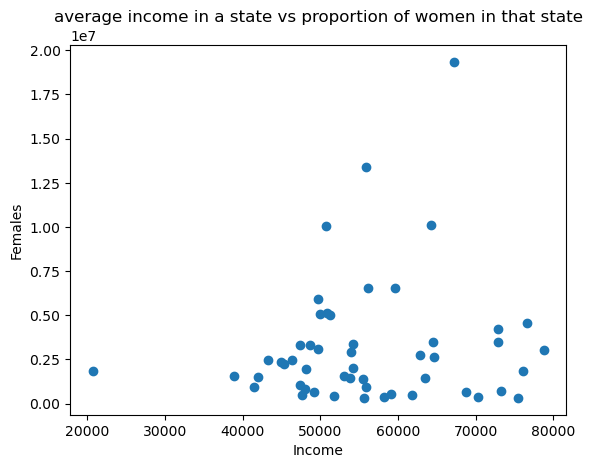

In [23]:
plt.scatter(x=final_df.Income, y=final_df.Female)
plt.xlabel('Income')
plt.ylabel('Females')
plt.title('average income in a state vs proportion of women in that state')
plt.show()

# 3.Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?


In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     51 non-null     object 
 1   TotalPop  51 non-null     int64  
 2   Hispanic  51 non-null     float64
 3   White     51 non-null     float64
 4   Black     51 non-null     float64
 5   Native    51 non-null     float64
 6   Asian     51 non-null     float64
 7   Pacific   51 non-null     float64
 8   Income    51 non-null     float64
 9   Male      51 non-null     int32  
 10  Female    51 non-null     int32  
dtypes: float64(7), int32(2), int64(1), object(1)
memory usage: 4.1+ KB


C:\Users\Muhammad Ramzan LLC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


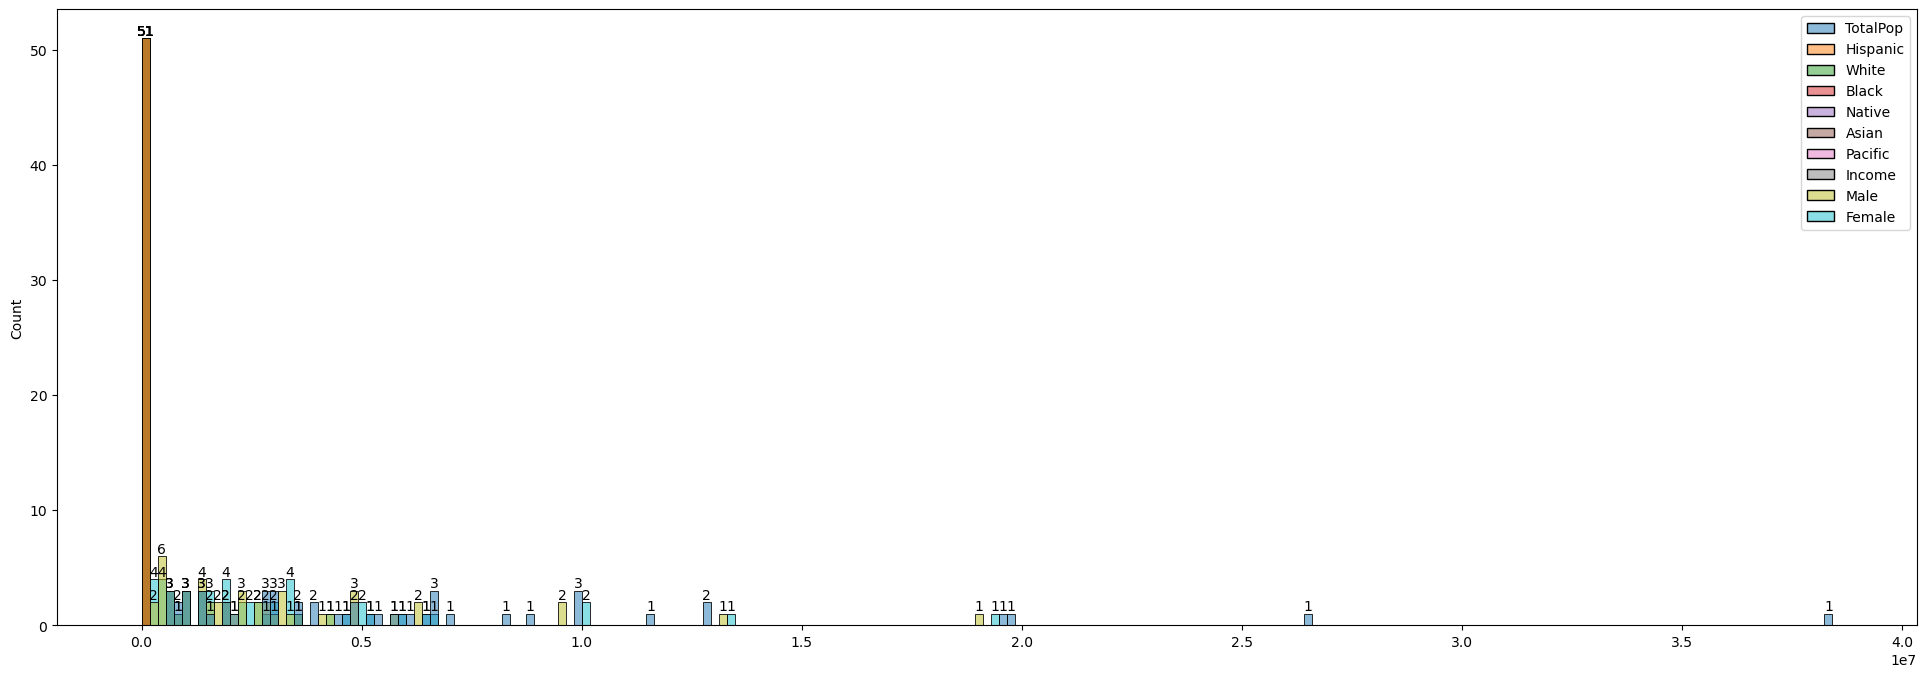

In [43]:
plt.figure(figsize=(24,8))
ax = sns.histplot(data=final_df)  # using column name as string

# Annotate each bar with its count
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # optionally, only annotate non-empty bars
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black')

plt.show()